In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/ml ders/stock prices/'

link = 'https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import pathlib
import pickle
import sys
from tqdm import tqdm


In [ ]:
tf.keras.utils.set_random_seed(42)
np.random.seed(42)

In [ ]:
traina = np.load(path + "traina.npy")
trainb = np.load(path + "trainb.npy")

testc = np.load(path + "testc.npy")
testd = np.load(path + "testd.npy")

In [ ]:
traina.shape, trainb.shape, testc.shape, testd.shape

((3003, 6, 200, 200, 3),
 (3003, 6, 200, 200, 3),
 (389, 6, 200, 200, 3),
 (365, 6, 200, 200, 3))

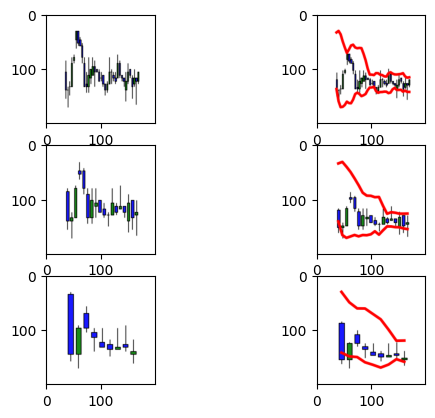

In [ ]:
plt.subplot(3, 2, 1)
plt.imshow(traina[1,0])

plt.subplot(3, 2, 2)
plt.imshow(traina[1,1])

plt.subplot(3, 2, 3)
plt.imshow(traina[1,2])

plt.subplot(3, 2, 4)
plt.imshow(traina[1,3])

plt.subplot(3, 2, 5)
plt.imshow(traina[1,4])

plt.subplot(3, 2, 6)
plt.imshow(traina[1,5])

In [ ]:
train = np.concatenate([traina, trainb])
train_labels = np.concatenate((np.ones(len(traina)), np.zeros(len(trainb))))

In [ ]:
test = np.concatenate([testc, testd])
test_labels = np.concatenate((np.ones(len(testc)), np.zeros(len(testd))))

In [ ]:
train.shape, test.shape

((6006, 6, 200, 200, 3), (754, 6, 200, 200, 3))

In [ ]:
train_indices = np.arange(len(train_labels))
np.random.shuffle(train_indices)

test_indices = np.arange(len(test_labels))
np.random.shuffle(test_indices)

In [ ]:
train = train[train_indices]
train_labels = train_labels[train_indices]

test = test[test_indices]
test_labels = test_labels[test_indices]

In [ ]:
# Define the CNN model
model = models.Sequential()

model.add(layers.Conv3D(64, (3, 3, 3), activation='relu', input_shape=(6, 200, 200, 3), padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train, train_labels, epochs=10, batch_size=32, validation_data=(test, test_labels))


Epoch 1/10
188/188 [==============================] - 32s 152ms/step - loss: 0.5644 - accuracy: 0.7066 - val_loss: 1.1841 - val_accuracy: 0.4881
Epoch 2/10
188/188 [==============================] - 26s 138ms/step - loss: 0.4124 - accuracy: 0.8054 - val_loss: 0.5714 - val_accuracy: 0.7029
Epoch 3/10
188/188 [==============================] - 26s 138ms/step - loss: 0.3398 - accuracy: 0.8501 - val_loss: 0.5158 - val_accuracy: 0.7653
Epoch 4/10
188/188 [==============================] - 26s 137ms/step - loss: 0.2093 - accuracy: 0.9202 - val_loss: 0.6748 - val_accuracy: 0.7255
Epoch 5/10
188/188 [==============================] - 26s 138ms/step - loss: 0.1143 - accuracy: 0.9594 - val_loss: 0.7581 - val_accuracy: 0.7493
Epoch 6/10
188/188 [==============================] - 26s 138ms/step - loss: 0.0667 - accuracy: 0.9764 - val_loss: 1.0722 - val_accuracy: 0.7069
Epoch 7/10
188/188 [==============================] - 26s 138ms/step - loss: 0.0417 - accuracy: 0.9873 - val_loss: 0.8678 - val_ac

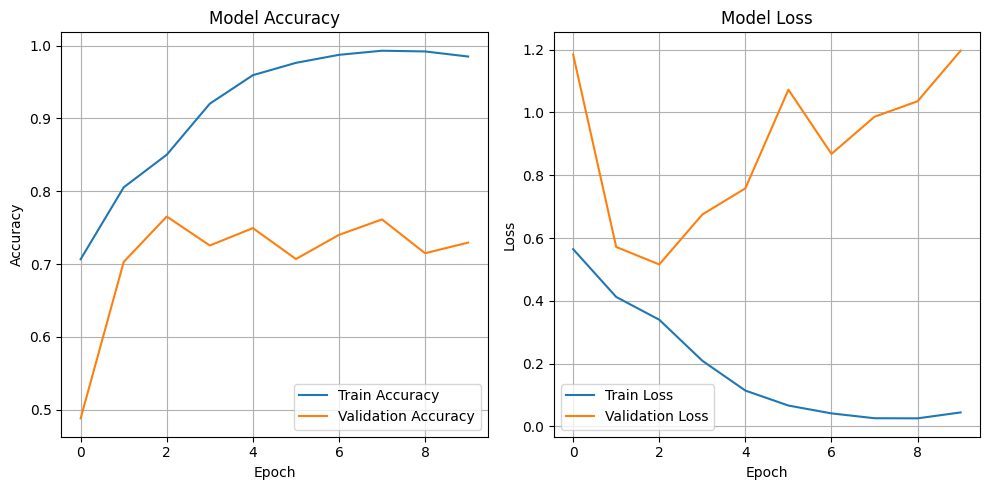

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()

In [ ]:
y_pred = model.predict(test)
pd.DataFrame(np.round(y_pred)).value_counts()

0.0    509
1.0    245
dtype: int64

<Axes: ylabel='Count'>

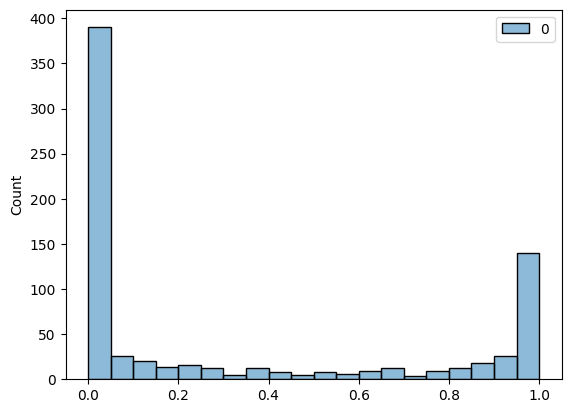

In [ ]:
sns.histplot(y_pred, bins=20)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
a = 0.8

y_pred_round = (y_pred > a).astype(int)

print(pd.DataFrame(y_pred_round).value_counts())

print(
    classification_report(test_labels, (y_pred_round))
)

0    558
1    196
dtype: int64
              precision    recall  f1-score   support

         0.0       0.62      0.95      0.75       365
         1.0       0.90      0.45      0.60       389

    accuracy                           0.69       754
   macro avg       0.76      0.70      0.67       754
weighted avg       0.76      0.69      0.67       754



In [ ]:
# Define the CNN model
model = models.Sequential()

model.add(layers.Conv3D(64, (3, 3, 3), activation='relu', input_shape=(6, 200, 200, 3), padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train, train_labels, epochs=3, batch_size=32, validation_data=(test, test_labels))

Epoch 1/3
188/188 [==============================] - 30s 142ms/step - loss: 0.5534 - accuracy: 0.7135 - val_loss: 0.9563 - val_accuracy: 0.5663
Epoch 2/3
188/188 [==============================] - 26s 138ms/step - loss: 0.4145 - accuracy: 0.8092 - val_loss: 0.6072 - val_accuracy: 0.6963
Epoch 3/3
188/188 [==============================] - 26s 138ms/step - loss: 0.3411 - accuracy: 0.8480 - val_loss: 0.4931 - val_accuracy: 0.7454


In [ ]:
y_pred = model.predict(test)
pd.DataFrame(np.round(y_pred)).value_counts()

24/24 [==============================] - 1s 38ms/step


0.0    409
1.0    345
dtype: int64

<Axes: ylabel='Count'>

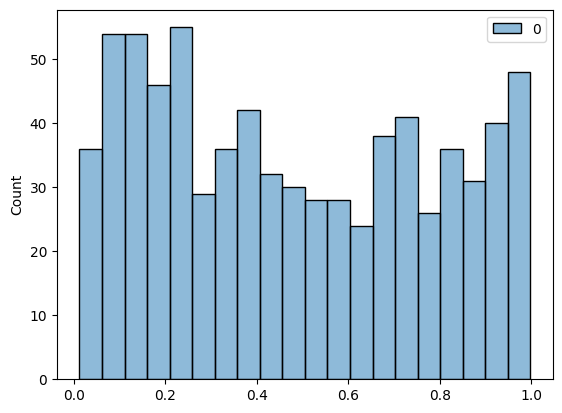

In [ ]:
sns.histplot(y_pred, bins=20)

In [ ]:
a = 0.8

y_pred_round = (y_pred > a).astype(int)

print(pd.DataFrame(y_pred_round).value_counts())

print(
    classification_report(test_labels, (y_pred_round))
)

0    598
1    156
dtype: int64
              precision    recall  f1-score   support

         0.0       0.59      0.96      0.73       365
         1.0       0.92      0.37      0.52       389

    accuracy                           0.66       754
   macro avg       0.75      0.67      0.63       754
weighted avg       0.76      0.66      0.62       754



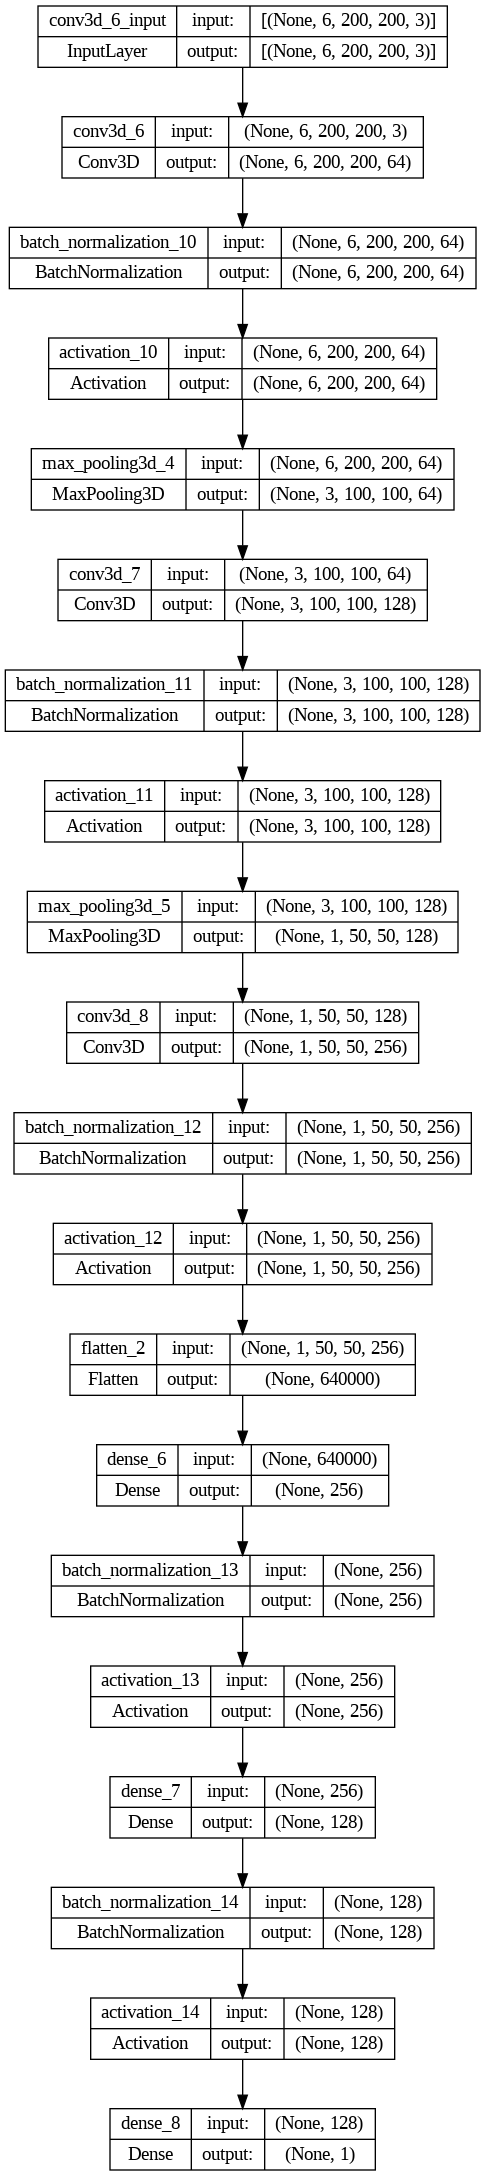

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Save the model in SavedModel format
model.save(path+'my_model_epoch3.keras')

# model = tf.keras.models.load_model(path+'my_model_epoch3.keras')
